In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

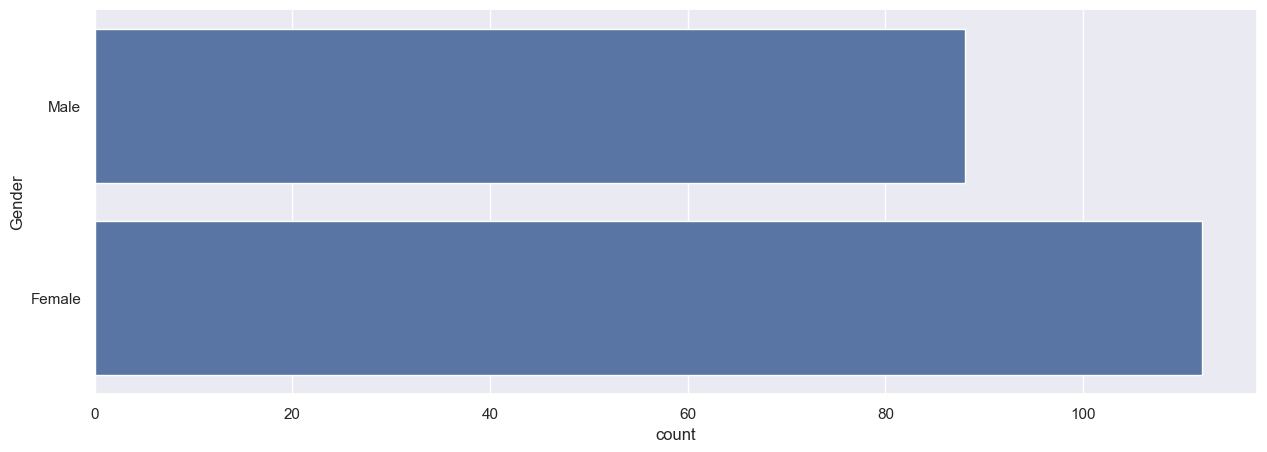

In [58]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

<Figure size 1000x600 with 0 Axes>

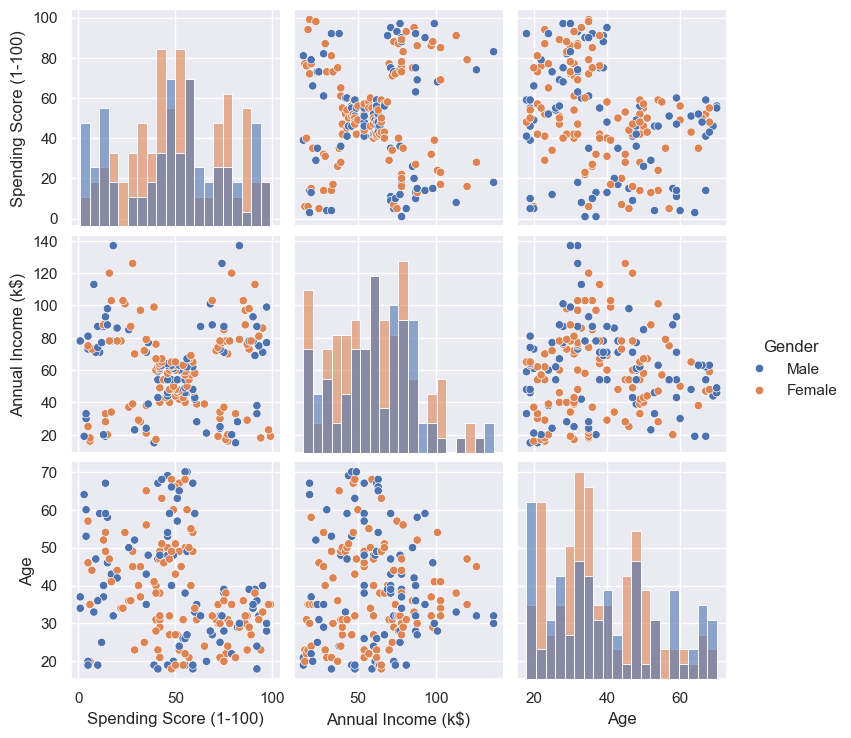

In [57]:


plt.figure(figsize=(10, 6))  # Set figure size

sns.pairplot(data=df, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue='Gender', diag_kind='hist', diag_kws={'bins': 20, 'alpha': 0.6})

plt.show()  # Show the plot


In [67]:
#Annual income vs Spending score

In [20]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

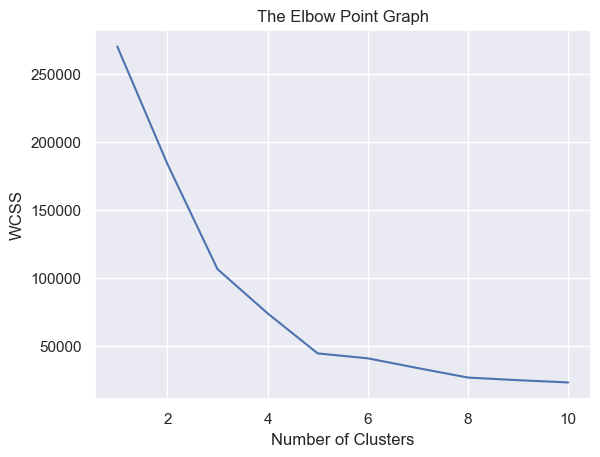

In [22]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


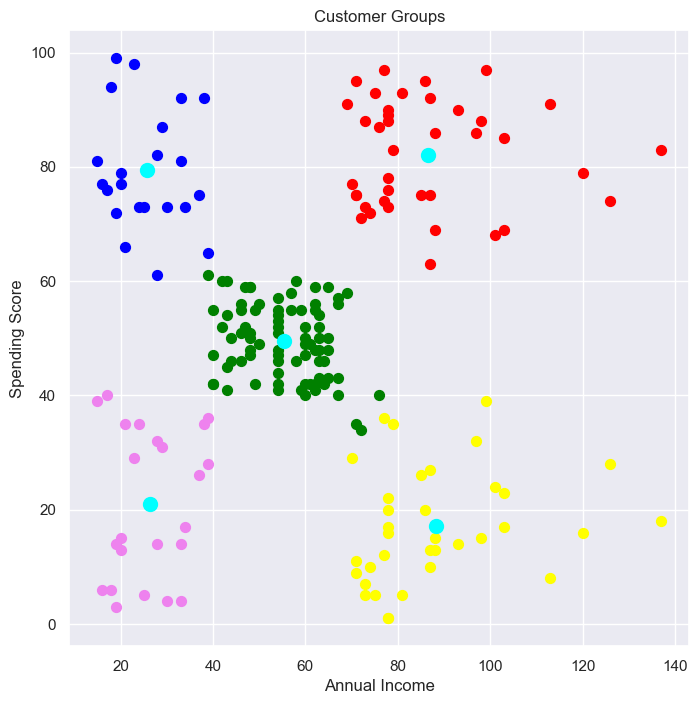

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [66]:
#Age vs Spending score

In [70]:
X1 = df.iloc[:,[2,4]].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [71]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X1)

  wcss.append(kmeans.inertia_)

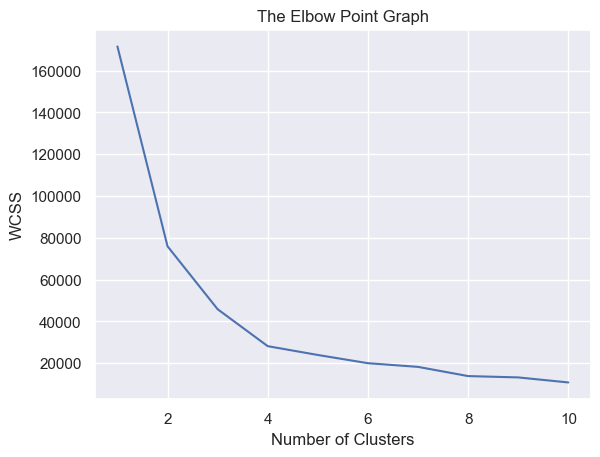

In [72]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y1 = kmeans.fit_predict(X1)

print(Y1)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


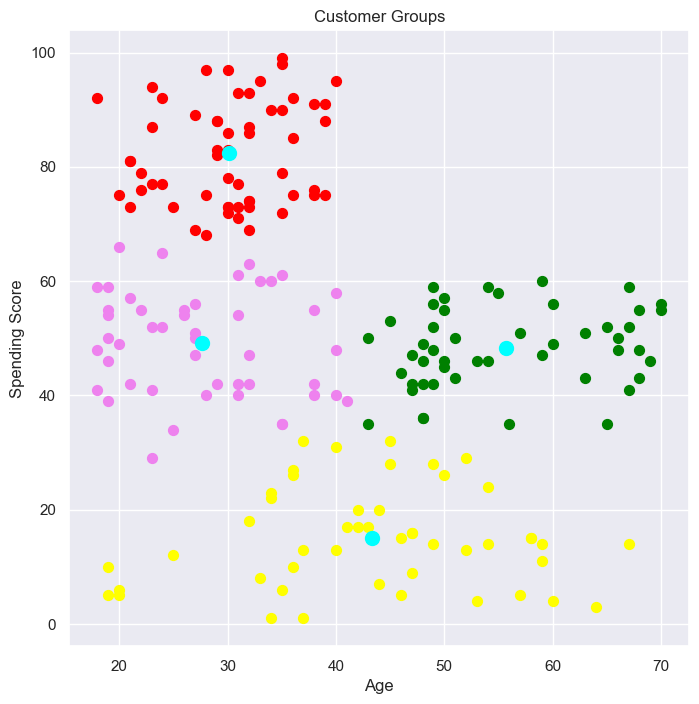

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(X1[Y1==0,0], X1[Y1==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X1[Y1==1,0], X1[Y1==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X1[Y1==2,0], X1[Y1==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X1[Y1==3,0], X1[Y1==3,1], s=50, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()